# Visualization with Matplotlib

**Learning Objectives:** Learn how to make basic plots using Matplotlib's *pylab* API and how to use the Matplotlib documentation.

This notebook focuses only on the Matplotlib API, rather that the broader question of how you can use this API to make effective and beautiful visualizations.

## Imports

The following imports should be used in all of your notebooks where Matplotlib in used:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Overview

The following conceptual organization is simplified and adapted from Benjamin Root's [AnatomyOfMatplotlib](https://github.com/WeatherGod/AnatomyOfMatplotlib) tutorial.

### Figures and Axes

* In Matplotlib a single visualization is a `Figure`.
* A `Figure` can have multiple areas, called *subplots*. Each *subplot* is an `Axes`.
* If you don't create a `Figure` and `Axes` yourself, Matplotlib will automatically create one for you.
* All plotting commands apply to the current `Figure` and `Axes`.

The following functions can be used to create and manage `Figure` and `Axes` objects.

Function          | Description                                                                                
:-----------------|:----------------------------------------------------------
`figure`          | Creates a new Figure
`gca`             | Get the current Axes instance
`savefig`         | Save the current Figure to a file
`sca`             | Set the current Axes instance
`subplot`         | Create a new subplot Axes for the current Figure
`subplots`        | Create a new Figure and a grid of subplots Axes

### Plotting Functions

Once you have created a `Figure` and one or more `Axes` objects, you can use the following function to put data onto that `Axes`.

Function          | Description
:-----------------|:--------------------------------------------
`bar`             | Make a bar plot
`barh`            | Make a horizontal bar plot
`boxplot`         | Make a box and whisker plot
`contour`         | Plot contours
`contourf`        | Plot filled contours
`hist`            | Plot a histogram
`hist2d`          | Make a 2D histogram plot
`imshow`          | Display an image on the axes
`matshow`         | Display an array as a matrix
`pcolor`          | Create a pseudocolor plot of a 2-D array
`pcolormesh`      | Plot a quadrilateral mesh
`plot`            | Plot lines and/or markers
`plot_date`       | Plot with data with dates
`polar`           | Make a polar plot
`scatter`         | Make a scatter plot of x vs y

### Plot modifiers

You can then use the following functions to modify your visualization.

Function          | Description
:-----------------|:---------------------------------------------------------------------
`annotate`        | Create an annotation: a piece of text referring to a data point
`box`             | Turn the Axes box on or off
`clabel`          | Label a contour plot
`colorbar`        | Add a colorbar to a plot
`grid`            | Turn the Axes grids on or off
`legend`          | Place a legend on the current Axes
`loglog`          | Make a plot with log scaling on both the *x* and *y* axis
`semilogx`        | Make a plot with log scaling on the *x* axis 
`semilogy`        | Make a plot with log scaling on the *y* axis
`subplots_adjust` | Tune the subplot layout
`tick_params`     | Change the appearance of ticks and tick labels
`ticklabel_format`| Change the ScalarFormatter used by default for linear axes
`tight_layout`    | Automatically adjust subplot parameters to give specified padding
`text`            | Add text to the axes
`title`           | Set a title of the current axes
`xkcd`            | Turns on [XKCD](http://xkcd.com/) sketch-style drawing mode
`xlabel`          | Set the *x* axis label of the current axis
`xlim`            | Get or set the *x* limits of the current axes
`xticks`          | Get or set the *x*-limits of the current tick locations and labels
`ylabel`          | Set the *y* axis label of the current axis
`ylim`            | Get or set the *y*-limits of the current axes
`yticks`          | Get or set the *y*-limits of the current tick locations and labels

## Basic plotting

For now, we will work with basic line plots (`plt.plot`) to show how the Matplotlib pylab plotting API works. In this case, we don't create a `Figure` so Matplotlib does that automatically.

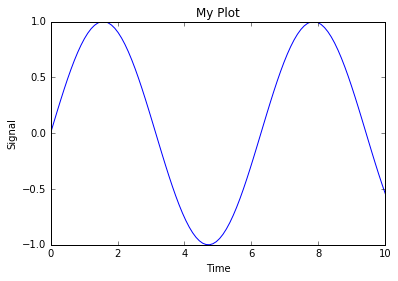

In [2]:
t = np.linspace(0, 10.0, 100)
plt.plot(t, np.sin(t))
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('My Plot'); # supress text output

## Basic plot modification

With a third argument you can provide the series color and line/marker style. Here we create a `Figure` object and modify its size.

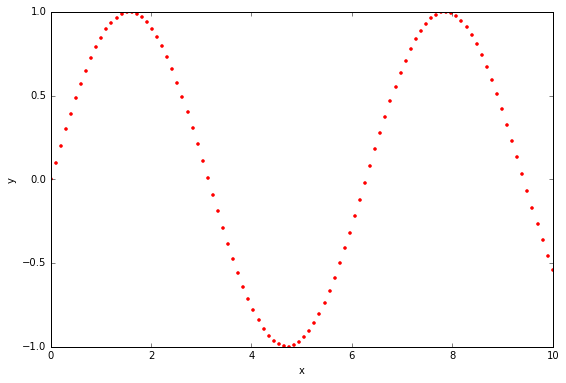

In [3]:
f = plt.figure(figsize=(9,6)) # 9" x 6", default is 8" x 5.5"

plt.plot(t, np.sin(t), 'r.');
plt.xlabel('x')
plt.ylabel('y')

Here is a list of the single character color strings:

```
    b: blue
    g: green
    r: red
    c: cyan
    m: magenta
    y: yellow
    k: black
    w: white
```

The following will show all of the line and marker styles:

In [4]:
from matplotlib import lines
lines.lineStyles.keys()

dict_keys(['-.', '', '-', ' ', '--', ':', 'None'])

In [5]:
from matplotlib import markers
markers.MarkerStyle.markers.keys()

dict_keys(['|', 0, 2, 3, 'H', 'd', 6, 1, 'p', '.', '', '4', 'o', '_', ' ', '>', 'h', '1', '2', 5, 'v', '*', '<', 7, ',', None, 'x', '+', '8', 'None', '3', 'D', '^', 's', 4])

To change the plot's limits, use `xlim` and `ylim`:

(-1.0, 1.0)

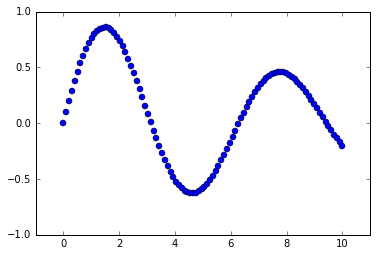

In [6]:
plt.plot(t, np.sin(t)*np.exp(-0.1*t),'bo')
plt.xlim(-1.0, 11.0)
plt.ylim(-1.0, 1.0)

You can change the ticks along a given axis by using `xticks`, `yticks` and `tick_params`:

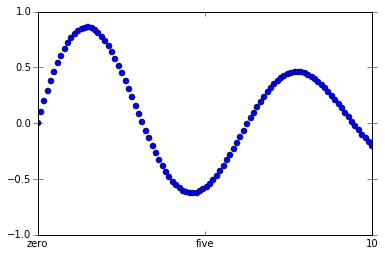

In [7]:
plt.plot(t, np.sin(t)*np.exp(-0.1*t),'bo')
plt.xlim(0.0, 10.0)
plt.ylim(-1.0, 1.0)
plt.xticks([0,5,10], ['zero','five','10'])
plt.tick_params(axis='y', direction='inout', length=10)

## Box and grid

You can enable a grid or disable the box. Notice that the ticks and tick labels remain.

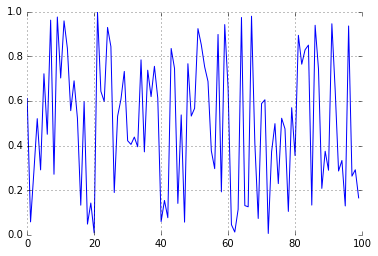

In [8]:
plt.plot(np.random.rand(100), 'b-')
plt.grid(True)
plt.box(False)

## Multiple series

Multiple calls to a plotting function will all target the current `Axes`:

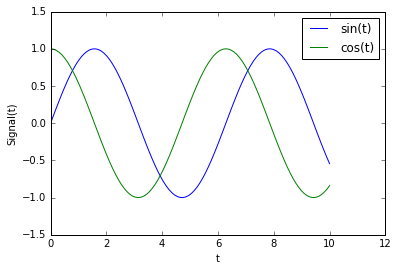

In [9]:
plt.plot(t, np.sin(t), label='sin(t)')
plt.plot(t, np.cos(t), label='cos(t)')
plt.xlabel('t')
plt.ylabel('Signal(t)')
plt.ylim(-1.5, 1.5)
plt.xlim(right=12.0)
plt.legend()

## Subplots

Subplots allow you to create a grid of plots in a single figure. There will be an `Axes` associated with each subplot and only one `Axes` can be active at a time.


The first way you can create subplots is to use the `subplot` function, which creates and activates a new `Axes` for the active `Figure`:

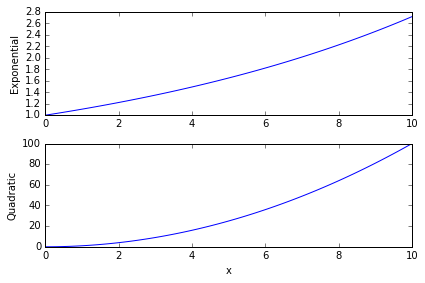

In [10]:
plt.subplot(2,1,1) # 2 rows x 1 col, plot 1
plt.plot(t, np.exp(0.1*t))
plt.ylabel('Exponential')

plt.subplot(2,1,2) # 2 rows x 1 col, plot 2
plt.plot(t, t**2)
plt.ylabel('Quadratic')
plt.xlabel('x')

plt.tight_layout()

In many cases, it is easier to use the `subplots` function, which creates a new `Figure` along with an array of `Axes` objects that can be indexed in a rational manner:

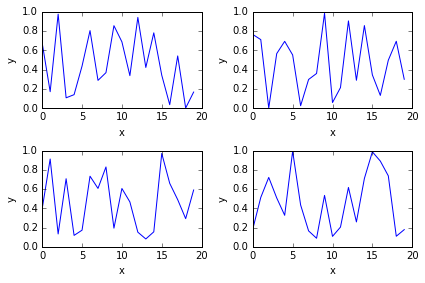

In [11]:
f, ax = plt.subplots(2, 2)

for i in range(2):
    for j in range(2):
        plt.sca(ax[i,j])
        plt.plot(np.random.rand(20))
        plt.xlabel('x')
        plt.ylabel('y')

plt.tight_layout()

The `subplots` function also makes it easy to pass arguments to `Figure` and to share axes:

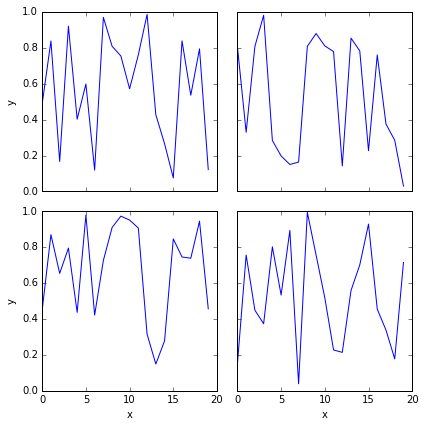

In [12]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6,6))

for i in range(2):
    for j in range(2):
        plt.sca(ax[i,j])
        plt.plot(np.random.rand(20))
        if i==1:
            plt.xlabel('x')
        if j==0:
            plt.ylabel('y')

plt.tight_layout()

## More marker and line styling

All plot commands, including `plot`, accept keyword arguments that can be used to style the lines in more detail. Fro more information see:

* [Controlling line properties](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties)
* [Specifying colors](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors)

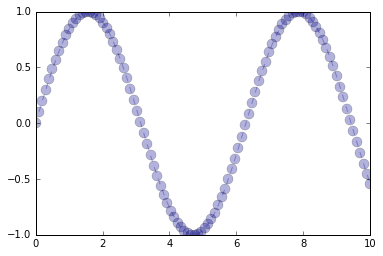

In [13]:
plt.plot(t, np.sin(t), marker='o', color='darkblue',
         linestyle='--', alpha=0.3, markersize=10)

## Resources

* [Matplotlib Documentation](http://matplotlib.org/contents.html), Matplotlib developers.
* [Matplotlib Gallery](http://matplotlib.org/gallery.html), Matplotlib developers.
* [Matplotlib List of Plotting Commands](http://matplotlib.org/api/pyplot_summary.html), Matplotlib developers.
* [AnatomyOfMatplotlib](https://github.com/WeatherGod/AnatomyOfMatplotlib), Benjamin Root.
* [Matplotlib Tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb), J.R. Johansson.